### Adding scripts to the path of the notebook

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 5\EthioMart_E-Commerce_NER\notebooks


### Import Statements

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme()

### Load the data

In [4]:
# path to the scrapped data
DATA_PATH = "../data/telegram_data.csv"

In [5]:
scraped_data = pd.read_csv(DATA_PATH)

### Descriptive Statistics of the scraped data

1) See the proportion of telegram channles from which the post/ads were scrapped from

In [6]:
# group the scrapped data by the channel_username
channel_groupings = scraped_data.groupby(by="channel_username")

In [7]:
for group in channel_groupings.groups:
    group_data = channel_groupings.get_group(name=group)
    ad_count = group_data.shape[0]
    percentage = (ad_count / scraped_data.shape[0]) * 100
    print(f"{percentage}% of the data came from {group} channel, which is about {ad_count} ads/posts/")

39.404553415061294% of the data came from @classybrands channel, which is about 2250 ads/posts/
8.056042031523642% of the data came from @kuruwear channel, which is about 460 ads/posts/
52.53940455341506% of the data came from @modernshoppingcenter channel, which is about 3000 ads/posts/


2) See the amount of data with missing messages (i.e just images), missing images

In [8]:
# dictionary for holding the missing data about messages
missing_data_stats = {}

for group in channel_groupings.groups:
    group_data = channel_groupings.get_group(name=group)
    
    # find the missing values
    group_missing = group_data.isna().mean()
    
    # add the results to the dictionary
    missing_data_stats[group] = {
        'messages' : group_missing['message'],
        'images': group_missing['media_path']
    }

missing_data_stats

{'@classybrands': {'messages': np.float64(0.5817777777777777),
  'images': np.float64(0.0013333333333333333)},
 '@kuruwear': {'messages': np.float64(0.508695652173913),
  'images': np.float64(0.05217391304347826)},
 '@modernshoppingcenter': {'messages': np.float64(0.6293333333333333),
  'images': np.float64(0.14533333333333334)}}

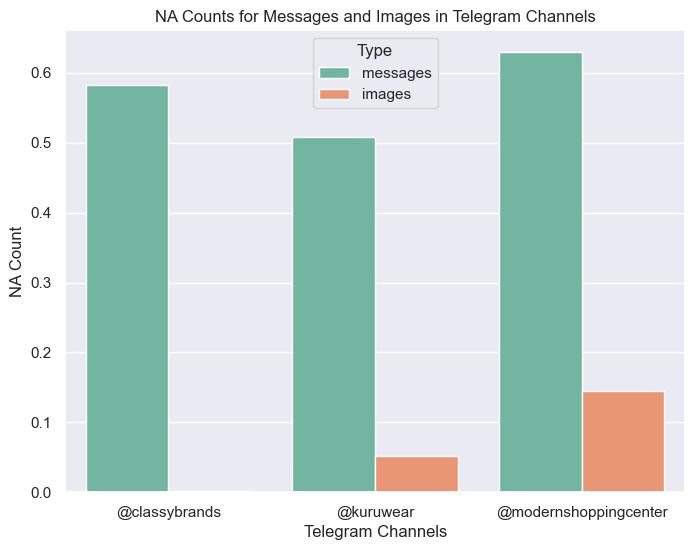

In [9]:
# Convert the data into a DataFrame for easier plotting
df = pd.DataFrame(missing_data_stats).T.reset_index().melt(id_vars='index', var_name='Type', value_name='NA Count')
df.rename(columns={'index': 'Channel'}, inplace=True)

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Channel', y='NA Count', hue='Type', palette='Set2')

# Add labels and title
plt.title('NA Counts for Messages and Images in Telegram Channels')
plt.xlabel('Telegram Channels')
plt.ylabel('NA Count')

# Show the plot
plt.show()

3) See the amount of missing data in general

In [10]:
scraped_data.isna().mean()

channel_title       0.000000
channel_username    0.000000
id                  0.000000
message             0.600876
date                0.000000
media_path          0.081086
dtype: float64

### Start preprocessing

1) Drop columns with NA values

In [11]:
print(f"The shape of the data before dropping rows with NA values: {scraped_data.shape}")

The shape of the data before dropping rows with NA values: (5710, 6)


In [12]:
data = scraped_data.dropna()

print(f"The resulting shape of the data after dropping rows with NA values: {data.shape}")

The resulting shape of the data after dropping rows with NA values: (2161, 6)


2) Remove emojis

In [13]:
from scripts.util import strip_emoji

In [14]:
data['message'] = data['message'].apply(strip_emoji)

C:\Users\VICTUS 16\AppData\Local\Temp\ipykernel_13840\2832144100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['message'] = data['message'].apply(strip_emoji)


3) Normalize the text data, i.e replace 'Fidels' that have the same sound with one selected 'Fidel'. Example replace 'ሃ','ኅ','ኃ','ሐ','ሓ','ኻ' with 'ሀ'

In [15]:
from scripts.util import normalize_char_level_missmatch

In [16]:
data['message'] = data['message'].apply(normalize_char_level_missmatch)

C:\Users\VICTUS 16\AppData\Local\Temp\ipykernel_13840\3744091449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['message'] = data['message'].apply(normalize_char_level_missmatch)


4) Remove punctuation and special characters from the messages

In [17]:
from scripts.util import remove_punc_and_special_chars

In [18]:
data['message'] = data['message'].apply(remove_punc_and_special_chars)

C:\Users\VICTUS 16\AppData\Local\Temp\ipykernel_13840\3823949546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['message'] = data['message'].apply(remove_punc_and_special_chars)


### Save the preprocessed data to a csv

In [20]:
# save path
EXPORT_PATH = "../data/telegram_data_preprocessed.csv"

# save to the export path
data.to_csv(EXPORT_PATH)